<a href="https://colab.research.google.com/github/ranjanchoubey/cmb-assignments/blob/master/CS2316_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

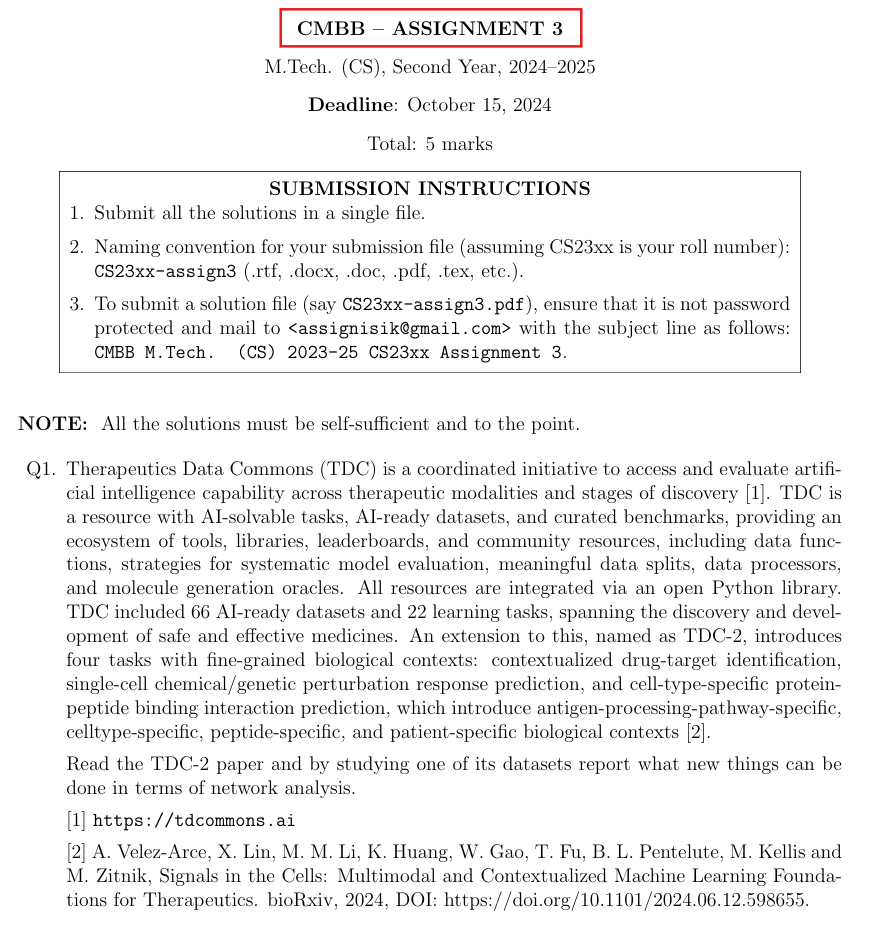

# **Analysis of Network-Based Applications in TDC-2 Datasets**

##**Objective**
To explore the potential for network analysis using the datasets from the TDC-2 initiative, specifically focusing on tasks with fine-grained biological contexts.

My goal is to identify new ways network analysis can be applied to enhance insights into therapeutic discovery and development.

---

## **Data Source**
- **TDC Platform:** [Therapeutics Data Commons](https://tdcommons.ai)  
- **Dataset Name:** DrugBank-based Drug-Target Interaction (DTI) dataset.  
- **Study Reference:** Velez-Arce et al., *Signals in the Cells: Multimodal and Contextualized Machine Learning Foundations for Therapeutics*.  
- **DOI:** [10.1101/2024.06.12.598655](https://doi.org/10.1101/2024.06.12.598655)

---

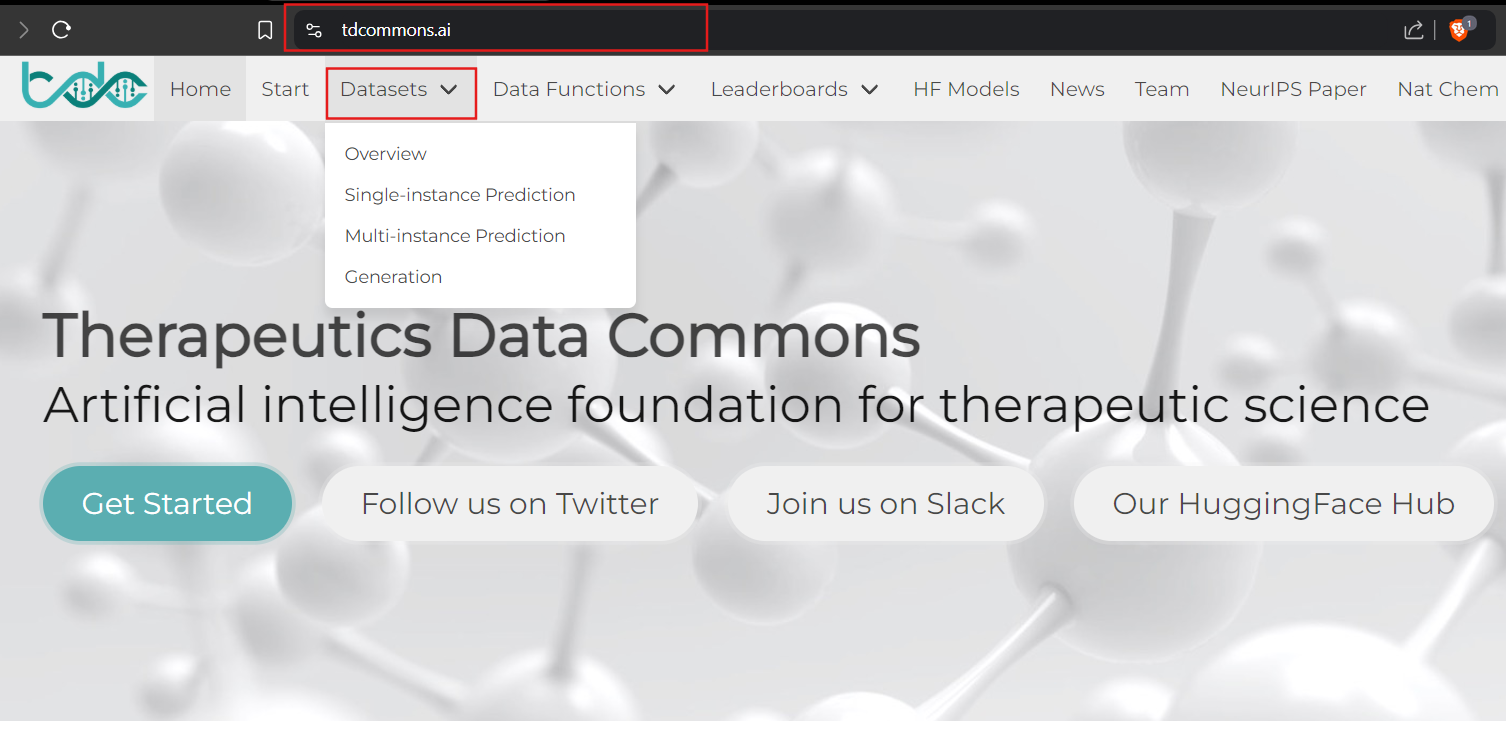

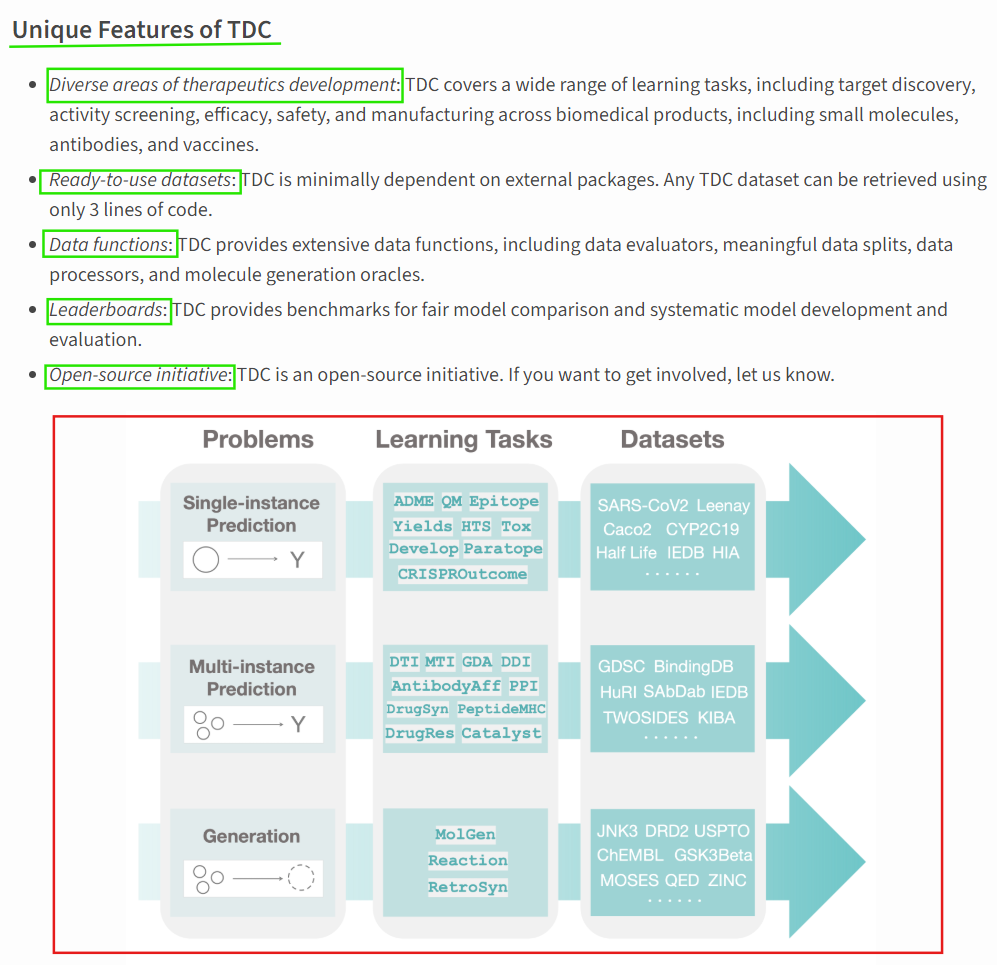

---

# - **Network Analysis**
For ***network analysis***, the DrugBank-based DTI dataset was selected.
- **Nodes**:
  - **Drugs:** Small molecules such as Aspirin and Atorvastatin.
  - **Targets:** Proteins such as COX-1 (PTGS1) and LDL receptor.
- **Edges**:
  - Drug-target interactions derived from experimental and computational sources.


---

## **Step 1:** Install PyTDC and Required Libraries

In [ ]:
! pip install PyTDC networkx matplotlib

## **Step 2:** Retrieve DrugBank-Based DTI Dataset

In [9]:
from tdc.utils import retrieve_dataset_names

# Retrieve all DTI datasets
dti_datasets = retrieve_dataset_names(name='DTI')
print("DTI Datasets:", dti_datasets)


DTI Datasets: ['davis', 'kiba', 'bindingdb_kd', 'bindingdb_ic50', 'bindingdb_ki', 'bindingdb_patent']


In [20]:
from tdc.multi_pred import DTI

# Load the DrugBank dataset
data = DTI(name='DAVIS')

# Retrieve data in DataFrame format
df = data.get_data(format='df')
df.head()


Found local copy...
Loading...
Done!


,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,43.0
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,10000.0
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,10000.0
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,10000.0
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,10000.0


In [21]:
df.shape

(25772, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25772 entries, 0 to 25771
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drug_ID    25772 non-null  int64  
 1   Drug       25772 non-null  object 
 2   Target_ID  25772 non-null  object 
 3   Target     25772 non-null  object 
 4   Y          25772 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1006.8+ KB


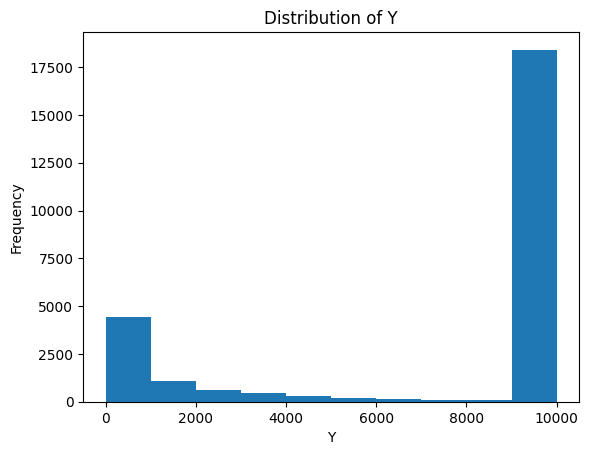

In [15]:
# @title Distribution of Y Values

# Analyze the distribution of 'Y'.
import matplotlib.pyplot as plt
plt.hist(df['Y'])
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Distribution of Y')
plt.show()

## **Step 3:** Construct the Drug-Target Interaction Network

In [23]:
import networkx as nx

G = nx.Graph()
for _, row in df.iterrows():
    drug = row['Drug']
    target = row['Target']
    G.add_node(drug, type='drug')  # Add drug as node
    G.add_node(target, type='target')  # Add target as node
    G.add_edge(drug, target)  # Add interaction as edge

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 447
Number of edges: 25772


## **Step 4:** Visualize the Network

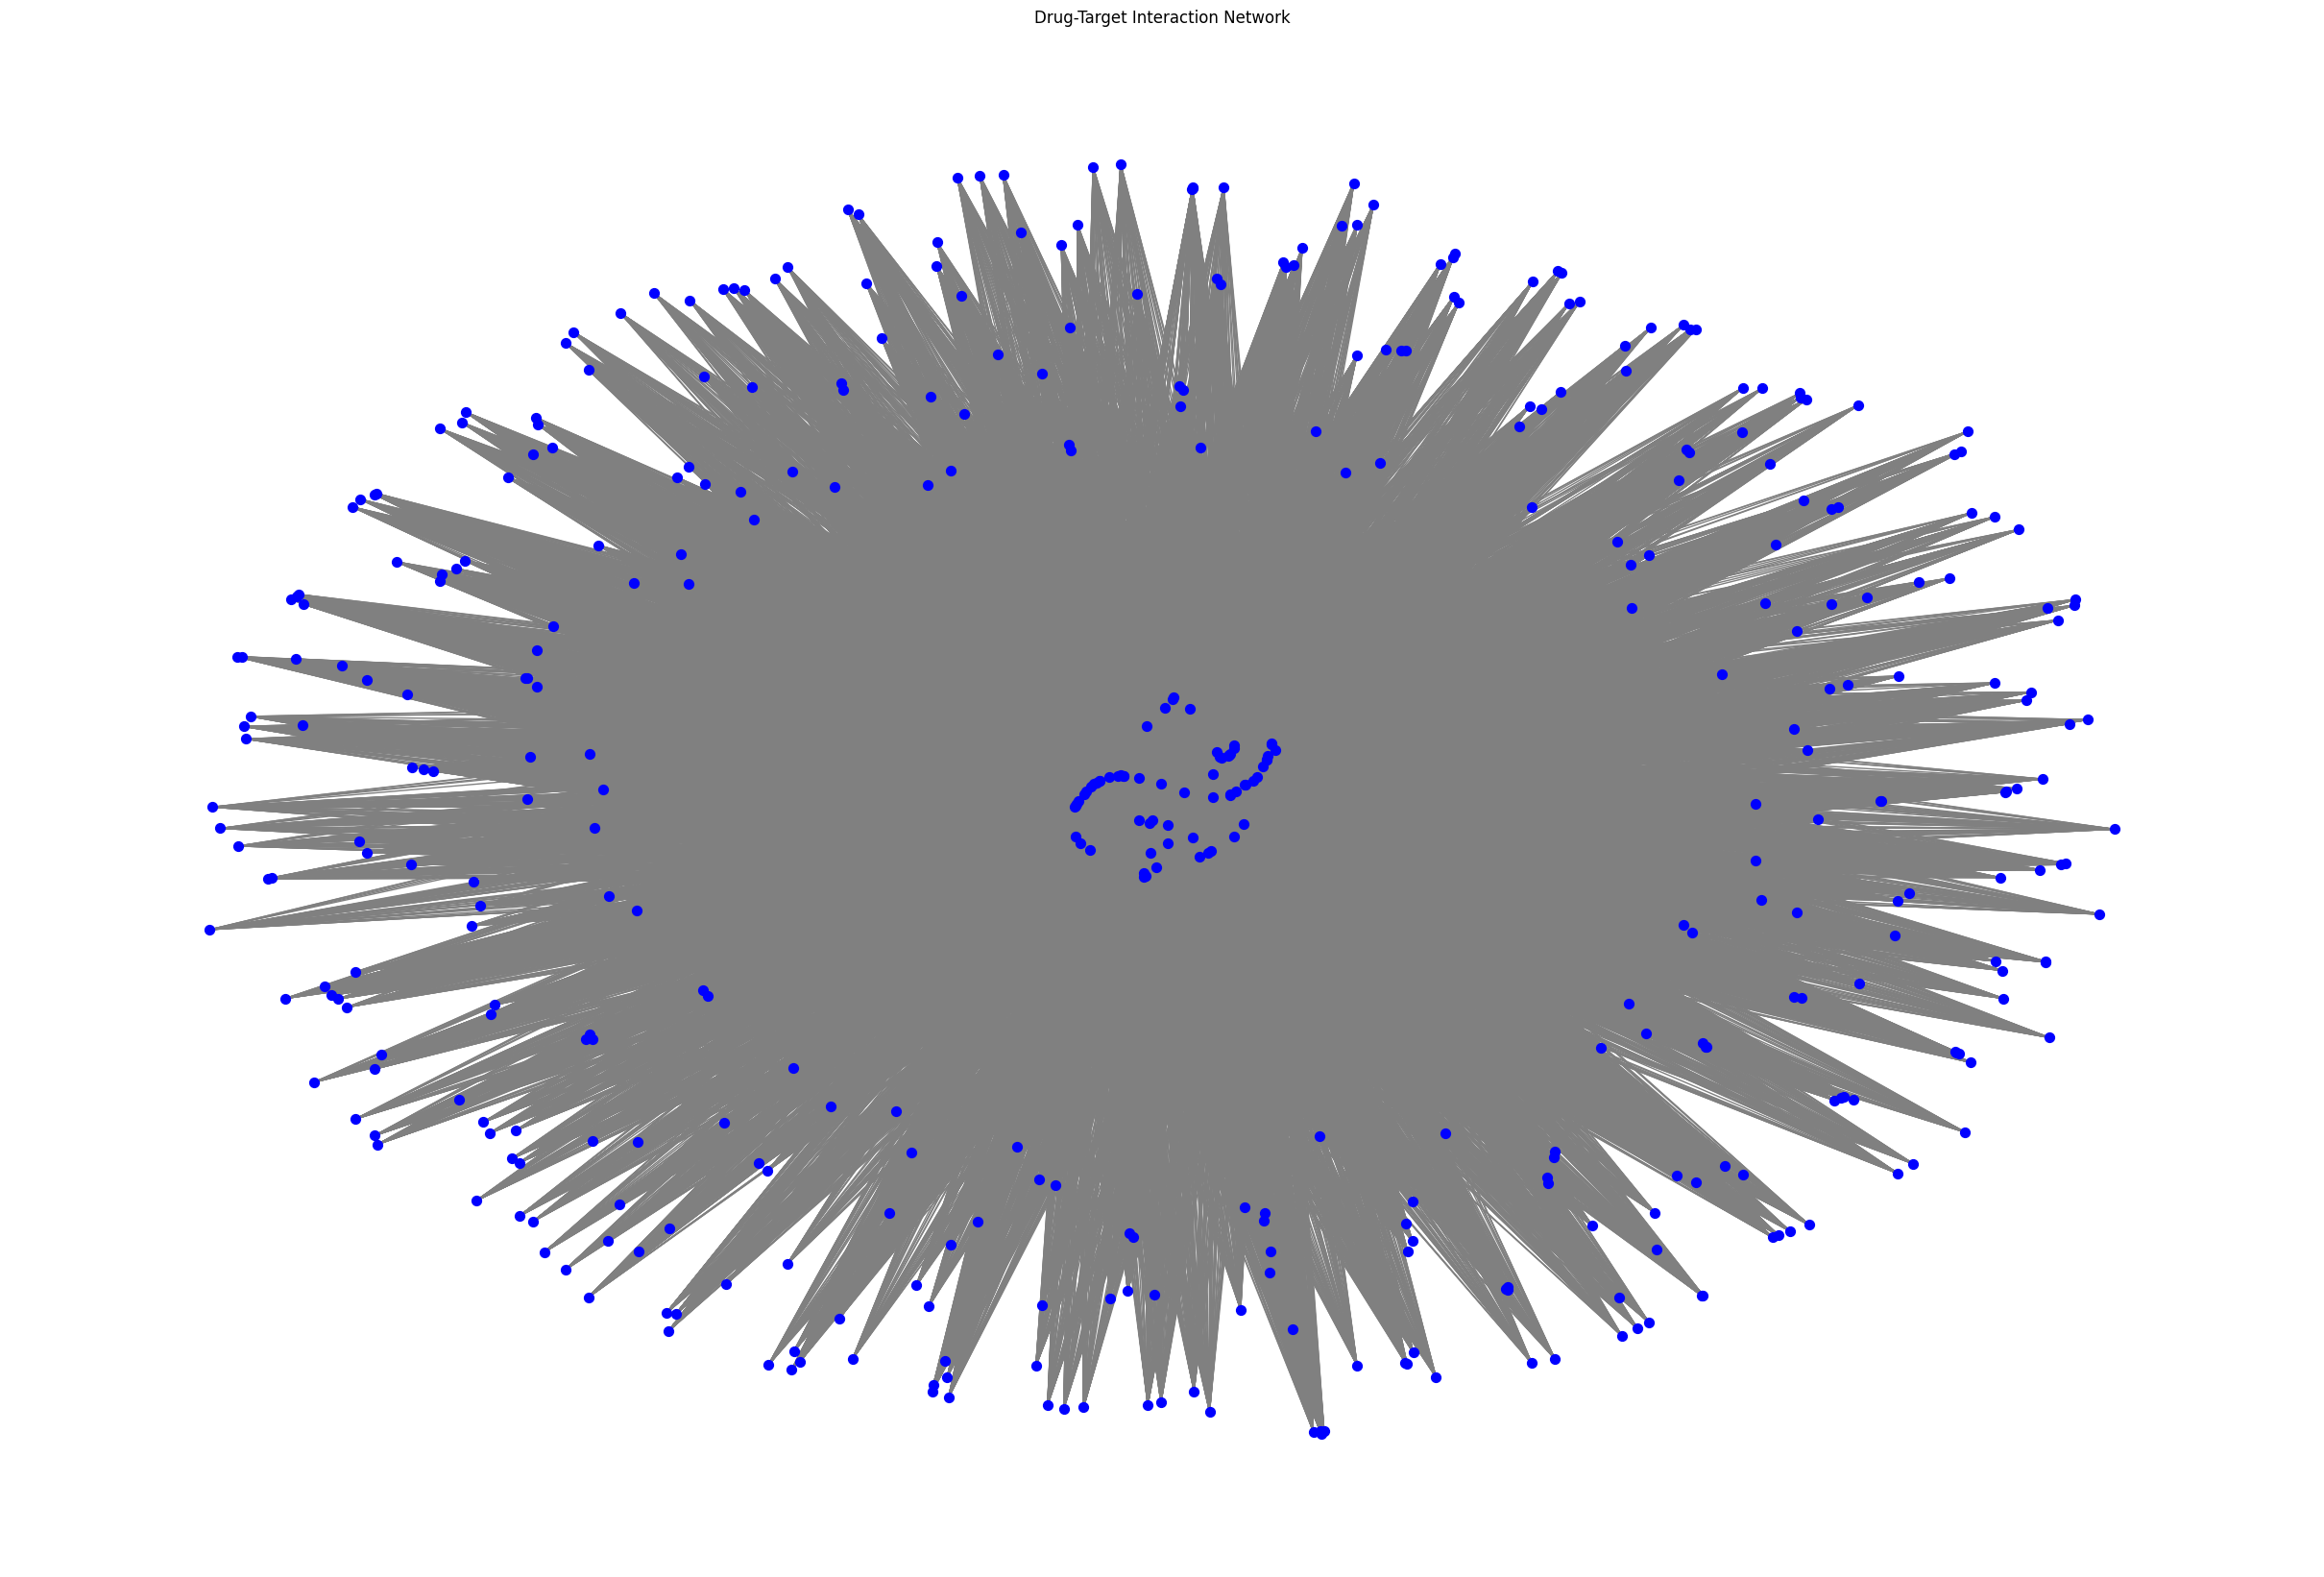

In [36]:
import matplotlib.pyplot as plt

# Draw the network
plt.figure(figsize=(24, 16))
nx.draw(
    G, with_labels=False, node_size=50, node_color='blue', edge_color='grey'
)
plt.title("Drug-Target Interaction Network")
plt.show()

## **Step 5:** Analyze the Network

In [33]:
# Find the top 5 hubs
degree_dict = dict(G.degree())
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
top_hubs = sorted_degree[:2]
print("Top 2 hub nodes (most connected):", top_hubs)



Top 2 hub nodes (most connected): [('Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12', 379), ('CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCCN5CCOCC5)ccc34)cc2)no1', 379)]


In [32]:
# Analyze connected components
connected_components = list(nx.connected_components(G))
print(f"Number of connected components: {len(connected_components)}")


Number of connected components: 1


## **Step 6:** Identify and Analyze Hubs and Communities

 - **Hub Node Analysis**

Top 10 hubs in the network: [('Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12', 379), ('CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCCN5CCOCC5)ccc34)cc2)no1', 379)]


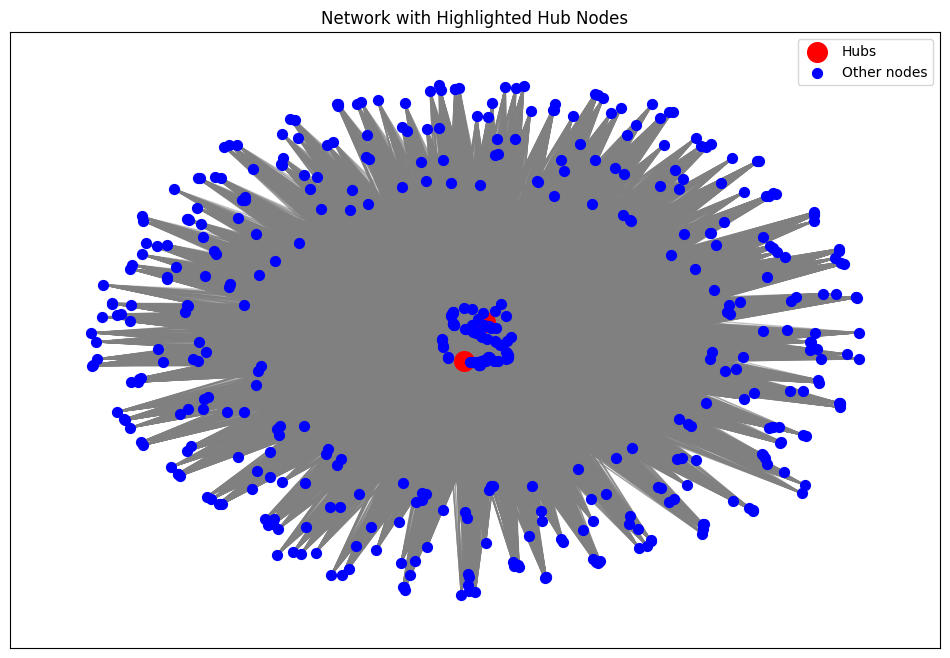

In [35]:
# Find top 2 most connected nodes (hubs)
top_hubs = sorted_degree[:2]
print("Top 10 hubs in the network:", top_hubs)

# Highlight hubs in the visualization
hub_nodes = [node for node, degree in top_hubs]
non_hub_nodes = [node for node in G.nodes() if node not in hub_nodes]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Position nodes with a spring layout
nx.draw_networkx_nodes(G, pos, nodelist=hub_nodes, node_color='red', node_size=200, label="Hubs")
nx.draw_networkx_nodes(G, pos, nodelist=non_hub_nodes, node_color='blue', node_size=50, label="Other nodes")
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
plt.legend()
plt.title("Network with Highlighted Hub Nodes")
plt.show()


---

- **Community Detection**

Number of communities detected: 1


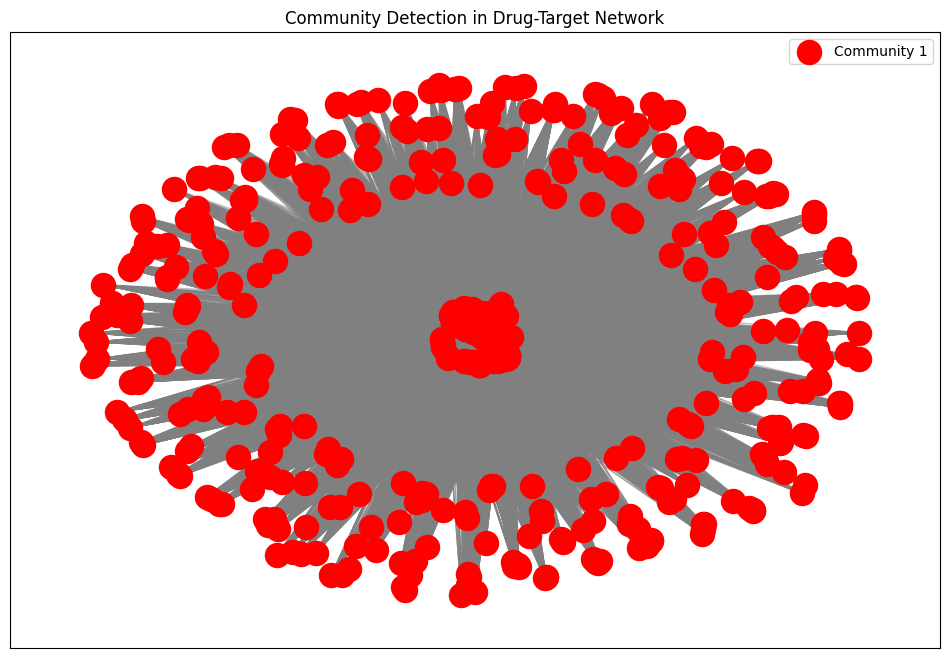

In [37]:
 from networkx.algorithms import community

# Detect communities using the greedy modularity algorithm
communities = community.greedy_modularity_communities(G)
print(f"Number of communities detected: {len(communities)}")

# Visualize communities
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'yellow', 'cyan', 'brown', 'lime']
for i, com in enumerate(communities[:10]):  # Visualize up to 10 communities
    nx.draw_networkx_nodes(G, pos, nodelist=list(com), node_color=colors[i % len(colors)], label=f"Community {i+1}")

nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
plt.legend()
plt.title("Community Detection in Drug-Target Network")
plt.show()


## **Step 7 :** Calculate Centrality Measures

In [42]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:2]
print("Top 2 nodes by degree centrality:", top_degree_centrality)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:2]
print("Top 2 nodes by betweenness centrality:", top_betweenness_centrality)



Top 2 nodes by degree centrality: [('Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12', 0.8497757847533632), ('CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCCN5CCOCC5)ccc34)cc2)no1', 0.8497757847533632)]
Top 2 nodes by betweenness centrality: [('Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12', 0.010615176689913047), ('CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCCN5CCOCC5)ccc34)cc2)no1', 0.010615176689913047)]


**End**